In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv(r'E:\up2\Datasets\up2restaurant.csv', encoding='unicode_escape')
dataset.head()

InvoiceNo        Description  Quantity     InvoiceDate  UnitPrice  \
0    536365  NORTH-INDIAN FOOD       6.0  12/1/2010 8:26       2.55   
1    536365  SOUTH-INDIAN FOOD       6.0  12/1/2010 8:26       3.39   
2    536365              PASTA       8.0  12/1/2010 8:26       2.75   
3    536365  NORTH-INDIAN FOOD       6.0  12/1/2010 8:26       3.39   
4    536365      NON-VEG-NORTH       6.0  12/1/2010 8:26       3.39   

   CustomerID         Country     Phone No   
0     17850.0  United Kingdom  9.108018e+09  
1     17850.0  United Kingdom  9.108018e+09  
2     17850.0  United Kingdom  9.108018e+09  
3     17850.0  United Kingdom  9.108018e+09  
4     17850.0  United Kingdom  9.108018e+09

In [3]:
# Detailing the Country distribution and customerid
country_data = dataset[['Country','CustomerID']].drop_duplicates()
country_data.groupby(['Country']).agg({'CustomerID' : 'count'}).sort_values('CustomerID',ascending = False).reset_index().rename(columns = {'CustomerID':'CustomerID Count'})

Country  CustomerID Count
0         United Kingdom              3950
1                Germany                94
2                 France                87
3                  Spain                31
4                Belgium                25
5            Switzerland                21
6               Portugal                19
7                  Italy                15
8                Finland                12
9                Austria                11
10                Norway                10
11           Netherlands                 9
12             Australia                 9
13       Channel Islands                 9
14               Denmark                 9
15                Cyprus                 8
16                Sweden                 8
17                 Japan                 8
18                Poland                 6
19                   USA                 4
20                Canada                 4
21           Unspecified                 4
22                Israel                 4
23                Greece                 4
24                  EIRE                 3
25                 Malta                 2
26  United Arab Emirates                 2
27               Bahrain                 2
28             Lithuania                 1
29        Czech Republic                 1
30               Lebanon                 1
31                   RSA                 1
32          Saudi Arabia                 1
33             Singapore                 1
34               Iceland                 1
35                Brazil                 1
36    European Community                 1
37             Hong Kong                 0

In [4]:
dataset = dataset[dataset['Country'] == 'United Kingdom'].reset_index(drop = True)

dataset.shape

(495124, 8)

In [5]:
dataset.isna().sum()
dataset= dataset[pd.notnull(dataset['CustomerID'])]

#Checking the description of the data
dataset.describe()

#cityData=dataset[['Country','CustomerID']].drop_duplicates()
#cityData.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)

Quantity      UnitPrice     CustomerID     Phone No 
count  361589.000000  361589.000000  361589.000000  3.615890e+05
mean       11.076120       3.256220   15548.118082  9.108016e+09
std       263.233701      70.681967    1594.354792  1.594355e+03
min    -80995.000000       0.000000   12346.000000  9.108012e+09
25%         2.000000       1.250000   14194.000000  9.108014e+09
50%         4.000000       1.950000   15516.000000  9.108016e+09
75%        12.000000       3.750000   16931.000000  9.108017e+09
max     80995.000000   38970.000000   18287.000000  9.108018e+09

In [6]:

dataset=dataset.query("Country=='United Kingdom'").reset_index(drop =True)
dataset.isnull().sum(axis=0)

InvoiceNo      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Phone No       0
dtype: int64

In [7]:
#Remove  missing values from Customer ID column, can ignore missing values in description column

dataset=dataset[pd.notnull(dataset['CustomerID'])]
dataset = dataset.query("Quantity > 0")
dataset.shape




(354060, 8)

In [8]:
#dataset.UnitPrice.min()

In [9]:
dataset=dataset[(dataset['Quantity']>0)]
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
#print(dataset['InvoiceDate']) 
dataset['TotalAmount']= dataset['Quantity'] * dataset['UnitPrice']
#print(dataset['TotalAmount']) 
dataset.shape

(354060, 9)

In [11]:
dataset.tail()

InvoiceNo            Description  Quantity         InvoiceDate  \
361584    581496            SWEET LASSI       6.0 2011-12-09 10:20:00   
361585    581496  PANEER MAKHNI BIRYANI      12.0 2011-12-09 10:20:00   
361586    581496            VEG BIRYANI      12.0 2011-12-09 10:20:00   
361587    581496      SOUTH-INDIAN FOOD      48.0 2011-12-09 10:20:00   
361588    581496          PANEER PAKODA      48.0 2011-12-09 10:20:00   

        UnitPrice  CustomerID         Country     Phone No   TotalAmount  
361584       2.95     16558.0  United Kingdom  9.108017e+09        17.70  
361585       0.79     16558.0  United Kingdom  9.108017e+09         9.48  
361586       0.79     16558.0  United Kingdom  9.108017e+09         9.48  
361587       0.19     16558.0  United Kingdom  9.108017e+09         9.12  
361588       0.19     16558.0  United Kingdom  9.108017e+09         9.12

# RFM Modelling

## What Is Recency, Frequency, Monetary Value (RFM)?
Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:


Recency: How recently a customer has made a purchase
Frequency: How often a customer makes a purchase
Monetary Value: How much money a customer spends on purchases

In [12]:
import datetime as  dt

dataset['InvoiceDate']=pd.to_datetime(dataset['InvoiceDate'])
dataset['InvoiceDate'].max()

Timestamp('2011-12-09 10:20:00')

In [13]:
#recency= latest date - last Inovice Data
#Frequency=count of invoice no.of  transcation(s)
#Monetary =sum of Total
#Amount for each customer

import datetime as  dt

#set Latest date 2011-12-10 as last invoice date was 2011-12-09.this is to caluculate the number of days from recent purchase

latest_Date=dt.datetime(2011,12,10)

ld = pd.to_datetime(latest_Date)




In [14]:
RFMScores =dataset.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_Date -x.max()).days,
                                                                        'InvoiceNo':lambda x: len(x),
                                                                       'TotalAmount':lambda x: x.sum()})


#Convert Invoice Date into type int
RFMScores['InvoiceDate']= RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)


#RENAME COLUMN NAMES TO RECENCY, FREQUENCY, AND MONETARY

RFMScores.rename(columns={'InvoiceDate':'Recency',
                         'InvoiceNo':'Frequency',
                         'TotalAmount':'Monetary'}, inplace =True)


RFMScores.reset_index()

CustomerID  Recency  Frequency  Monetary
0        12346.0      325          1  77183.60
1        12747.0        2        103   4196.01
2        12748.0        1       4572  33625.62
3        12749.0        3        199   4090.88
4        12820.0        3         59    942.34
...          ...      ...        ...       ...
3916     18280.0      277         10    180.60
3917     18281.0      180          7     80.82
3918     18282.0        7         12    178.05
3919     18283.0        3        756   2094.88
3920     18287.0       42         70   1837.28

[3921 rows x 4 columns]

In [15]:
#DESCRIPTIVE STATISTICS
RFMScores.Recency.describe()

count    3921.000000
mean       91.785004
std        99.478518
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

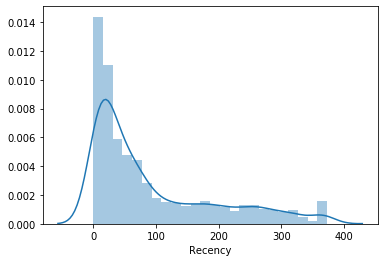

In [16]:
#RECENCY DISTRIBUTION PLOT
import seaborn as sns

x=RFMScores['Recency']
ax= sns.distplot(x)


In [17]:
RFMScores.Frequency.describe()


count    3921.000000
mean       90.298393
std       217.576162
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

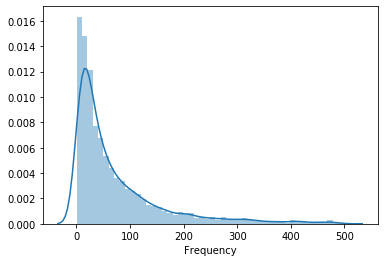

In [18]:
x=RFMScores.query('Frequency < 500')['Frequency']
ax= sns.distplot(x)


In [19]:
RFMScores.Monetary.describe()

count      3921.000000
mean       1862.604888
std        7475.921750
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.160000
max      259187.860000
Name: Monetary, dtype: float64

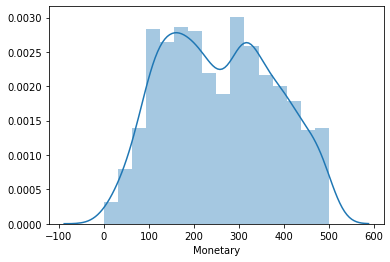

In [20]:
x=RFMScores.query('Monetary < 500')['Monetary']
ax= sns.distplot(x)


In [21]:
#Split into four Segments using quantiles
quantiles =RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles =quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996,
  0.5: 651.8199999999999,
  0.75: 1575.1599999999999}}

In [22]:
#FUNCTIONS TO CREATE R, F AND M SEGMENTS
#imp
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
def FnMScoring(x,p,d):
    if x <=d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    

In [23]:
#calculate ADD R, F AND M SEGMENT VALUE COLUMNS IN THE EXISTING DATASET TO SHOW R, F, AND M SEGMENT VALUES

RFMScores['R']= RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F']= RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M']= RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))

RFMScores.head()


Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12747.0           2        103   4196.01  1  1  1
12748.0           1       4572  33625.62  1  1  1
12749.0           3        199   4090.88  1  1  1
12820.0           3         59    942.34  1  2  2

In [24]:
#calculate and Add RFM group value column showing combined concatenated score of RFM
RFMScores['RFMGroup']=RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)


#Calculate and Add RFMScore value column showing total sum of RFM Group values

RFMScores['RFMScore'] =RFMScores[['R' ,'F', 'M']].sum(axis = 1)
RFMScores.head()


Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12747.0           2        103   4196.01  1  1  1      111         3
12748.0           1       4572  33625.62  1  1  1      111         3
12749.0           3        199   4090.88  1  1  1      111         3
12820.0           3         59    942.34  1  2  2      122         5

In [25]:
#assign loyalty level to each customer

loyaltyLevel=['HIGHLY VISITED', 'REGULAR', 'OCCASIONALLY VISITED', 'NEW VISITORS']
scoreCuts= pd.qcut(RFMScores.RFMScore, q=4, labels=loyaltyLevel,duplicates="drop")
RFMScores['RFM_Loyalty_Level']=scoreCuts.values

RFMScores.reset_index()
RFMScores.tail(15)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
18265.0          72         46    801.51  3  2  2      322         7   
18268.0         134          1     25.50  3  4  4      344        11   
18269.0         366          7    168.60  4  4  4      444        12   
18270.0          38         11    283.15  2  4  4      244        10   
18272.0           2        166   3078.58  1  1  1      111         3   
18273.0           2          3    204.00  1  4  4      144         9   
18274.0          30         11    175.92  2  4  4      244        10   
18276.0          43         14    335.86  2  4  3      243         9   
18277.0          58          8    110.38  3  4  4      344        11   
18278.0          73          9    173.90  3  4  4      344        11   
18280.0         277         10    180.60  4  4  4      444        12   
18281.0         180          7     80.82  4  4  4      444        12   
18282.0           7         12    178.05  1  4  4      144         9   
18283.0           3        756   2094.88  1  1  1      111         3   
18287.0          42         70   1837.28  2  2  1      221         5   

               RFM_Loyalty_Level  
CustomerID                        
18265.0                  REGULAR  
18268.0             NEW VISITORS  
18269.0             NEW VISITORS  
18270.0     OCCASIONALLY VISITED  
18272.0           HIGHLY VISITED  
18273.0     OCCASIONALLY VISITED  
18274.0     OCCASIONALLY VISITED  
18276.0     OCCASIONALLY VISITED  
18277.0             NEW VISITORS  
18278.0             NEW VISITORS  
18280.0             NEW VISITORS  
18281.0             NEW VISITORS  
18282.0     OCCASIONALLY VISITED  
18283.0           HIGHLY VISITED  
18287.0           HIGHLY VISITED

In [26]:
#Validate the data for RFMGroup =111

RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

CustomerID  Recency  Frequency   Monetary  R  F  M RFMGroup  RFMScore  \
0     18102.0        1        430  259187.86  1  1  1      111         3   
1     17450.0        8        337  194550.79  1  1  1      111         3   
2     17511.0        2        963   91062.38  1  1  1      111         3   
3     16684.0        4        277   66653.56  1  1  1      111         3   
4     14096.0        4       5111   65164.79  1  1  1      111         3   
5     13694.0        3        568   65039.62  1  1  1      111         3   
6     15311.0        3       2359   60273.30  1  1  1      111         3   
7     13089.0        2       1818   58825.83  1  1  1      111         3   
8     15769.0        7        130   56252.72  1  1  1      111         3   
9     15061.0        3        403   54534.14  1  1  1      111         3   

  RFM_Loyalty_Level  
0    HIGHLY VISITED  
1    HIGHLY VISITED  
2    HIGHLY VISITED  
3    HIGHLY VISITED  
4    HIGHLY VISITED  
5    HIGHLY VISITED  
6    HIGHLY VISITED  
7    HIGHLY VISITED  
8    HIGHLY VISITED  
9    HIGHLY VISITED

### Recency Vs Frequency

In [27]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency

graph = RFMScores.query("Monetary < 50000 and Frequency < 2000 ")

plot_data =[ gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'NEW VISITORS'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='NEW VISITORS'")['Frequency'],
                          mode='markers',
                          name='NEW VISITORS' ,
                          marker =dict(size =7,
                                      line=dict(width=1),
                                      color='blue',
                                      opacity =0.8
                                      )
                         ),
             gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'OCCASIONALLY VISITED'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='OCCASIONALLY VISITED'")['Frequency'],
                          mode='markers',
                          name='OCCASIONALLY VISITED' ,
                          marker =dict(size =9,
                                      line=dict(width=1),
                                      color='green',
                                      opacity =0.5
                                      )
                         ),
             gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'REGULAR'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='REGULAR'")['Frequency'],
                          mode='markers',
                          name='REGULAR' ,
                          marker =dict(size =11,
                                      line=dict(width=1),
                                      color='red',
                                      opacity =0.9
                                      )
                         ),
            gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'HIGHLY VISITED'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='HIGHLY VISITED'")['Frequency'],
                          mode='markers',
                          name='HIGHLY VISITED' ,
                          marker =dict(size =13,
                                      line=dict(width=1),
                                      color='black',
                                      opacity =0.9
                                      )
                         ),
           ]

plot_layout =gobj.Layout(
    yaxis={'title':"Frequency"},
    xaxis={'title':'Recency'},
    title='Segments'
)

fig = gobj.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)


#### FREQUENCY VS MONETARY

In [28]:
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000 ")

plot_data =[ gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'NEW VISITORS'")['Frequency'], 
                          y=graph.query("RFM_Loyalty_Level =='NEW VISITORS'")['Monetary'],
                          mode='markers',
                          name='NEW VISITORS' ,
                          marker =dict(size =7,
                                      line=dict(width=1),
                                      color='blue',
                                      opacity =0.8
                                      )
                         ),
             gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'OCCASIONALLY VISITED'")['Frequency'], 
                          y=graph.query("RFM_Loyalty_Level =='OCCASIONALLY VISITED'")['Monetary'],
                          mode='markers',
                          name='OCCASIONALLY VISITED' ,
                          marker =dict(size =9,
                                      line=dict(width=1),
                                      color='green',
                                      opacity =0.5
                                      )
                         ),
             gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'REGULAR'")['Frequency'], 
                          y=graph.query("RFM_Loyalty_Level =='REGULAR'")['Monetary'],
                          mode='markers',
                          name='REGULAR' ,
                          marker =dict(size =11,
                                      line=dict(width=1),
                                      color='red',
                                      opacity =0.9
                                      )
                         ),
            gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'HIGHLY VISITED'")['Frequency'], 
                          y=graph.query("RFM_Loyalty_Level =='HIGHLY VISITED'")['Monetary'],
                          mode='markers',
                          name='HIGHLY VISITED' ,
                          marker =dict(size =13,
                                      line=dict(width=1),
                                      color='black',
                                      opacity =0.9
                                      )
                         ),
           ]

plot_layout =gobj.Layout(
    yaxis={'title':"Monetary"},
    xaxis={'title':'Frequency'},
    title='Segments'
)

fig = gobj.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)


#### Recency vs Monetary

In [29]:
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000 ")

plot_data =[ gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'NEW VISITORS'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='NEW VISITORS'")['Monetary'],
                          mode='markers',
                          name='NEW VISITORS' ,
                          marker =dict(size =7,
                                      line=dict(width=1),
                                      color='blue',
                                      opacity =0.8
                                      )
                         ),
             gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'OCCASIONALLY VISITED'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='OCCASIONALLY VISITED'")['Monetary'],
                          mode='markers',
                          name='OCCASIONALLY VISITED' ,
                          marker =dict(size =9,
                                      line=dict(width=1),
                                      color='green',
                                      opacity =0.5
                                      )
                         ),
             gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'REGULAR'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='REGULAR'")['Monetary'],
                          mode='markers',
                          name='REGULAR' ,
                          marker =dict(size =11,
                                      line=dict(width=1),
                                      color='red',
                                      opacity =0.9
                                      )
                         ),
            gobj.Scatter(x=graph.query("RFM_Loyalty_Level == 'HIGHLY VISITED'")['Recency'], 
                          y=graph.query("RFM_Loyalty_Level =='HIGHLY VISITED'")['Monetary'],
                          mode='markers',
                          name='HIGHLY VISITED' ,
                          marker =dict(size =13,
                                      line=dict(width=1),
                                      color='black',
                                      opacity =0.9
                                      )
                         ),
           ]

plot_layout =gobj.Layout(
    yaxis={'title':"Monetary"},
    xaxis={'title':'Recency'},
    title='Segments'
)

fig = gobj.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

# K-Means Clustering

In [30]:
#Handle negative and zero values so as to handle infinte nubers during log transformation
def handle_neg_n_zero(num):
    if num <=0:
        return 1
    else:
        return num
#handle_neg_n_zero function to Recency and Monetary columns

RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]


#performing log transformation to bring data into normal or near normal distribution

Log_Tfd_data = RFMScores[['Recency' , 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)


Log_Tfd_data

Recency  Frequency  Monetary
CustomerID                              
12346.0       5.784      0.000    11.254
12747.0       0.693      4.635     8.342
12748.0       0.000      8.428    10.423
12749.0       1.099      5.293     8.317
12820.0       1.099      4.078     6.848
...             ...        ...       ...
18280.0       5.624      2.303     5.196
18281.0       5.193      1.946     4.392
18282.0       1.946      2.485     5.182
18283.0       1.099      6.628     7.647
18287.0       3.738      4.248     7.516

[3921 rows x 3 columns]

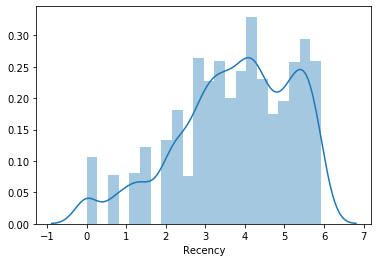

In [31]:
#Data distribution after data normalization for Recency

Recency_Plot =Log_Tfd_data['Recency']
ax=sns.distplot(Recency_Plot)

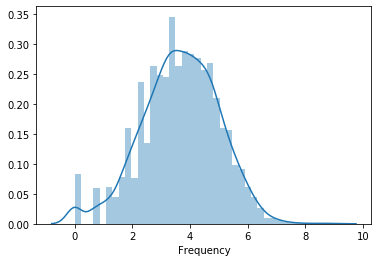

In [32]:
#Data distribution after data normalization for Frequency

Frequency_Plot =Log_Tfd_data.query('Frequency < 1000')['Frequency']
ax=sns.distplot(Frequency_Plot)

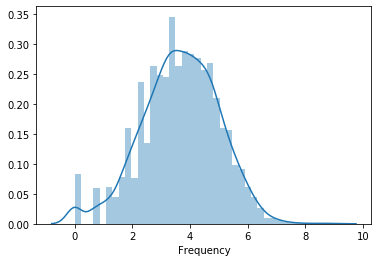

In [33]:
#Data distribution after data normalization for Monetary

Frequency_Plot =Log_Tfd_data.query('Frequency < 1000')['Frequency']
ax=sns.distplot(Frequency_Plot)

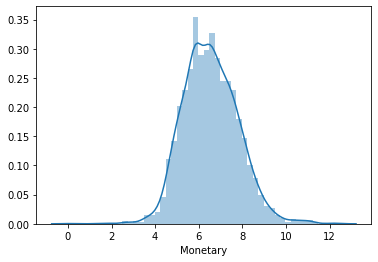

In [34]:
#Data distribution after data normalization for Monetary

Monetary_Plot =Log_Tfd_data.query('Monetary < 1000')['Monetary']
ax=sns.distplot(Monetary_Plot)

In [35]:
from sklearn.preprocessing import StandardScaler

# bring the data on same scale
scaleobj =StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_data)

Scaled_Data = pd.DataFrame(Scaled_Data, index= RFMScores.index, columns = Log_Tfd_data.columns)

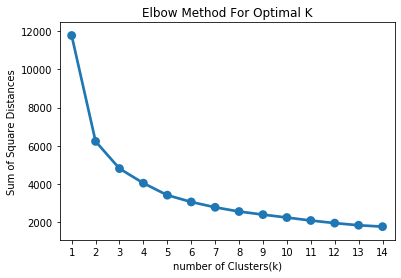

In [36]:
from sklearn.cluster import KMeans

sumOfSqDist = {}
for k in range(1,15):
    km=KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km=km.fit(Scaled_Data)
    sumOfSqDist[k] = km.inertia_
    
    
#plot the graph for sum of square distance values and Number of Clusters
sns.pointplot(x= list(sumOfSqDist.keys()),y= list(sumOfSqDist.values()))
plt.xlabel('number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal K')
plt.show()

In [37]:
#perform K-mean clustering or build the K-means clustering model

KMean_clust = KMeans(n_clusters= 4, init='k-means++', max_iter =1000)
KMean_clust.fit(Scaled_Data)
RFMScores['Cluster']= KMean_clust.labels_
RFMScores.tail()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
18280.0         277         10    180.60  4  4  4      444        12   
18281.0         180          7     80.82  4  4  4      444        12   
18282.0           7         12    178.05  1  4  4      144         9   
18283.0           3        756   2094.88  1  1  1      111         3   
18287.0          42         70   1837.28  2  2  1      221         5   

               RFM_Loyalty_Level  Cluster  
CustomerID                                 
18280.0             NEW VISITORS        2  
18281.0             NEW VISITORS        2  
18282.0     OCCASIONALLY VISITED        3  
18283.0           HIGHLY VISITED        0  
18287.0           HIGHLY VISITED        1

<Figure size 504x504 with 0 Axes>

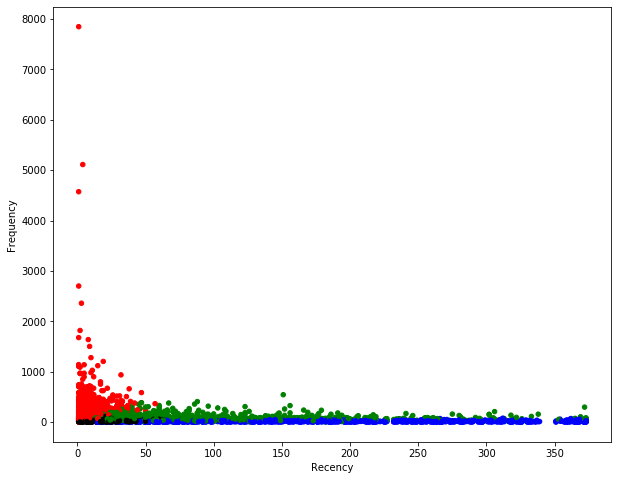

In [38]:
from  matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter plot frequency VS Recency
colors=["red", "green", "blue","black"]
RFMScores['Color']= RFMScores['Cluster'].map(lambda p: colors[p])
ax=RFMScores.plot(kind="scatter",
                 x="Recency",
                 y="Frequency",
                 figsize=(10,8),
                 c = RFMScores['Color'])



In [39]:
RFMScores.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12747.0           2        103   4196.01  1  1  1      111         3   
12748.0           1       4572  33625.62  1  1  1      111         3   
12749.0           3        199   4090.88  1  1  1      111         3   
12820.0           3         59    942.34  1  2  2      122         5   

               RFM_Loyalty_Level  Cluster  Color  
CustomerID                                        
12346.0     OCCASIONALLY VISITED        1  green  
12747.0           HIGHLY VISITED        0    red  
12748.0           HIGHLY VISITED        0    red  
12749.0           HIGHLY VISITED        0    red  
12820.0           HIGHLY VISITED        0    red

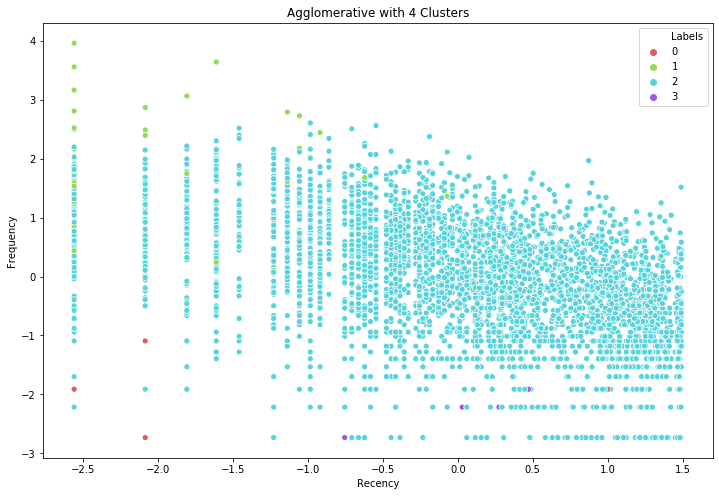

In [40]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=4, linkage='average').fit(Scaled_Data)

Scaled_Data['Labels'] = agglom.labels_
RFMScores['Cluster']= agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(Scaled_Data['Recency'], Scaled_Data['Frequency'], hue=Scaled_Data['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('Agglomerative with 4 Clusters')
plt.show()


In [41]:
RFMScores.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12747.0           2        103   4196.01  1  1  1      111         3   
12748.0           1       4572  33625.62  1  1  1      111         3   
12749.0           3        199   4090.88  1  1  1      111         3   
12820.0           3         59    942.34  1  2  2      122         5   

               RFM_Loyalty_Level  Cluster  Color  
CustomerID                                        
12346.0     OCCASIONALLY VISITED        0  green  
12747.0           HIGHLY VISITED        2    red  
12748.0           HIGHLY VISITED        1    red  
12749.0           HIGHLY VISITED        2    red  
12820.0           HIGHLY VISITED        2    red

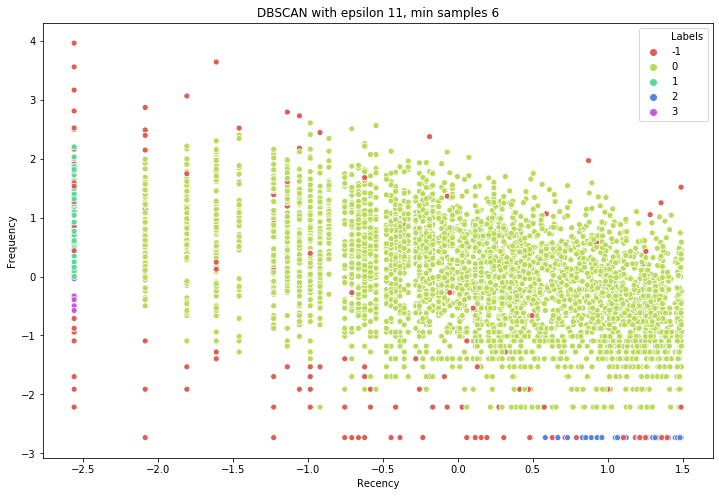

In [42]:
from sklearn.cluster import DBSCAN 
db = DBSCAN(eps=0.4, min_samples=6).fit(Scaled_Data)

Scaled_Data['Labels'] = db.labels_
RFMScores['Cluster']= db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(Scaled_Data['Recency'], Scaled_Data['Frequency'], hue=Scaled_Data['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

In [43]:
RFMScores.head()


Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12747.0           2        103   4196.01  1  1  1      111         3   
12748.0           1       4572  33625.62  1  1  1      111         3   
12749.0           3        199   4090.88  1  1  1      111         3   
12820.0           3         59    942.34  1  2  2      122         5   

               RFM_Loyalty_Level  Cluster  Color  
CustomerID                                        
12346.0     OCCASIONALLY VISITED       -1  green  
12747.0           HIGHLY VISITED        0    red  
12748.0           HIGHLY VISITED       -1    red  
12749.0           HIGHLY VISITED        0    red  
12820.0           HIGHLY VISITED        0    red

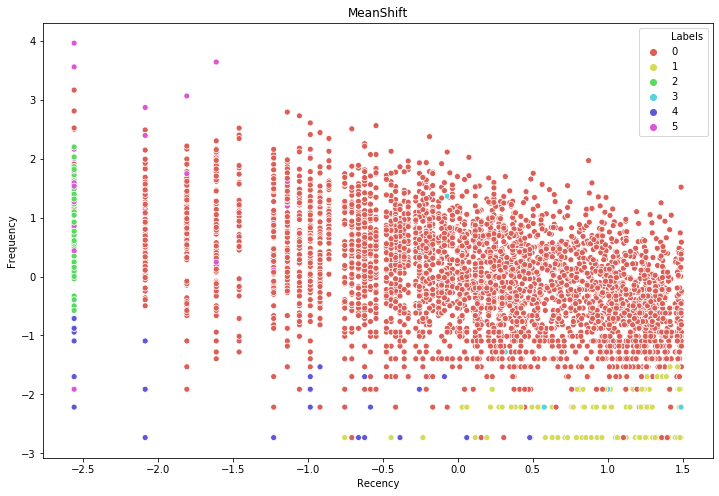

In [44]:

from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(Scaled_Data, quantile=0.4)
ms = MeanShift(bandwidth).fit(Scaled_Data)
RFMScores['Cluster']= db.labels_
Scaled_Data['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(Scaled_Data['Recency'], Scaled_Data['Frequency'], hue=Scaled_Data['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

In [45]:
RFMScores.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12747.0           2        103   4196.01  1  1  1      111         3   
12748.0           1       4572  33625.62  1  1  1      111         3   
12749.0           3        199   4090.88  1  1  1      111         3   
12820.0           3         59    942.34  1  2  2      122         5   

               RFM_Loyalty_Level  Cluster  Color  
CustomerID                                        
12346.0     OCCASIONALLY VISITED       -1  green  
12747.0           HIGHLY VISITED        0    red  
12748.0           HIGHLY VISITED       -1    red  
12749.0           HIGHLY VISITED        0    red  
12820.0           HIGHLY VISITED        0    red